### Monte Carlo Playground
Playing around with some Monte Carlo Simulations, eventually the goal is to replicate some examples and logic from Taleb, N.N., 2020. The Statistical Consequences of Fat Tails.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Pretty Display of Variables
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

# Double resolution plotting for retina display
%config InlineBackend.figure_format ='retina'

%matplotlib inline

##### Read in S&P500 data

In [2]:
sp500 = pd.read_csv("data/sp500_daily_train_data.csv")
sp500.head(1)

,loctimestamp,target_ret,ret,ret_risk,r_f,svix,qskew,qkurt,market,market_risk,size,size_risk,value,value_risk,momentum,momentum_risk
0,2004-01-05,0.001599,0.012253,0.000028,0.0097,0.028482,-2.420643,23.880412,0.011929,0.000343,0.004191,0.000367,0.0001,0.00006,0.005485,0.000084


In [3]:
sp500['loctimestamp'][-1:]

3302    2017-07-18
Name: loctimestamp, dtype: object

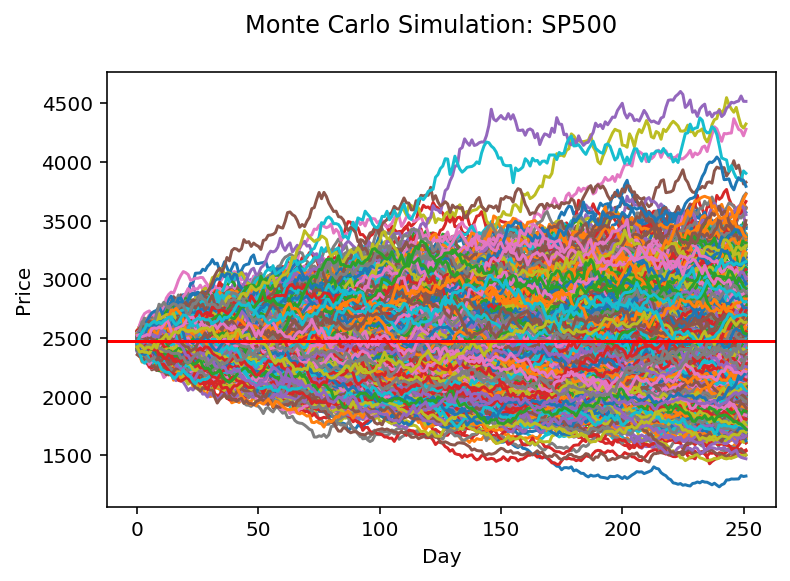

In [4]:
start = sp500['loctimestamp'][0]
end = sp500['loctimestamp'][-1:]

returns = sp500['ret']

last_price = 2472.54

#Number of Simulations
num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
    
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: SP500')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

##### ToDo
- Binomial Distribution
- Other Distributions
- Fat tailed Distributions
- Calculate Max Drawdowns and VaR